In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Taxon

In [2]:
df_taxon = pd.read_parquet('../processed_data/taxon_coverage_g.parquet')

In [3]:
df_taxon

,Bifidobacterium,Collinsella,Bacteroides,Phocaeicola,Prevotella,Faecalibacterium,Flavonifractor,Blautia_A,Copromonas,Streptococcus,...,Salinibacter,Cuneatibacter,Stoquefichus,Trueperella,Plantactinospora,Tsukamurella,UMGS621,HGM10766,Anaerosphaera,Kingella
ERR2835298,211.67,1.64,32.42,12.28,16.16,15.18,0.58,7.11,1.88,12.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR12302558,199.43,60.90,137.22,0.00,0.00,0.00,0.53,102.31,1.35,11.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR13622751,149.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15127829,475.15,0.00,0.00,0.00,0.00,0.00,5.87,7.50,0.00,424.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR12325043,146.95,40.13,0.00,0.00,0.00,0.00,0.00,3.98,0.00,4.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12996060,48.52,27.74,15.17,0.00,0.00,31.06,22.19,0.00,0.00,54.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR12122795,95.56,22.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR6425772,409.79,0.00,377.01,297.10,0.00,1.20,97.51,3.50,12.63,4.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8427932,373.98,26.24,0.00,0.00,0.00,0.00,0.00,19.49,0.00,3.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


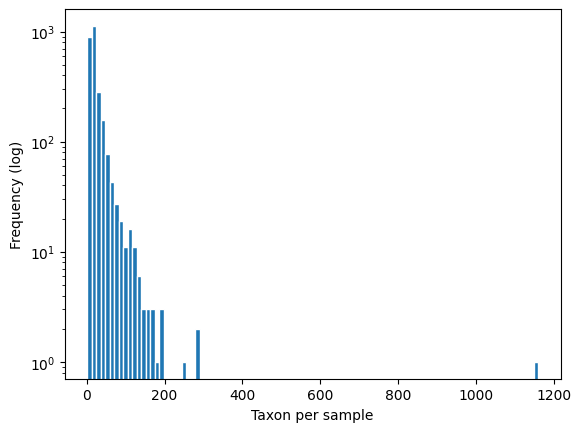

In [4]:
# taxon per Sample
count_taxon_sample = (df_taxon > 0).sum(1).sort_values(ascending=False)
plt.hist(count_taxon_sample.values, edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Taxon per sample')
plt.yscale('log')
plt.show()

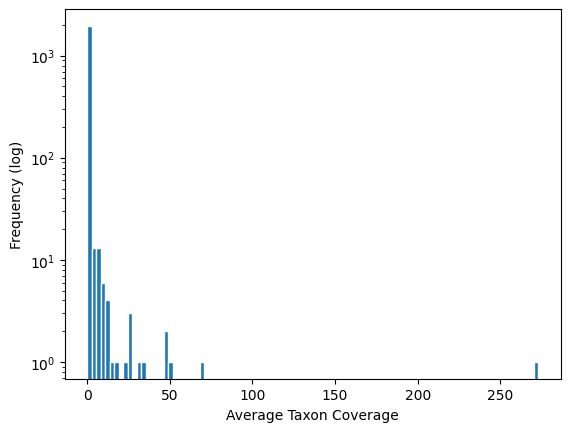

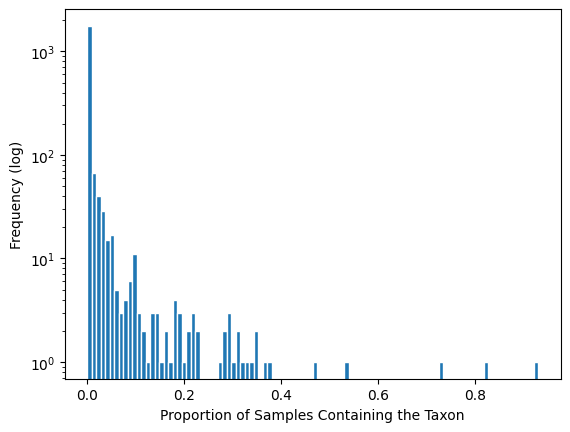

In [5]:
# Average taxon Coverage
sum_taxon_coverage = df_taxon.sum(0).sort_values(ascending=False)
plt.hist(sum_taxon_coverage.values/df_taxon.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Average Taxon Coverage')
plt.yscale('log')
plt.show()

# Average taxon Count
count_taxon = (df_taxon > 0).sum(0).sort_values(ascending=False)
plt.hist(count_taxon.values / df_taxon.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Proportion of Samples Containing the Taxon')
plt.yscale('log')
plt.show()

In [6]:
count_threshold = 200

print(f'# Taxon that appear in less than {count_threshold} samples: {int((count_taxon < count_threshold).sum())}')

# Taxon that appear in less than 200 samples: 1937


# Genes

In [7]:
df_genes = pd.read_parquet('../processed_data/gene_coverage.parquet')
df_genes = df_genes.set_index("Sample")

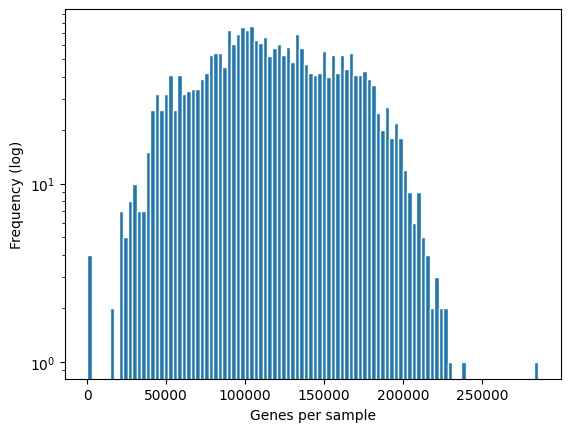

In [8]:
# Genes per Sample
count_genes_sample = (df_genes > 0).sum(1).sort_values(ascending=False)
plt.hist(count_genes_sample.values, edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Genes per sample')
plt.yscale('log')
plt.show()

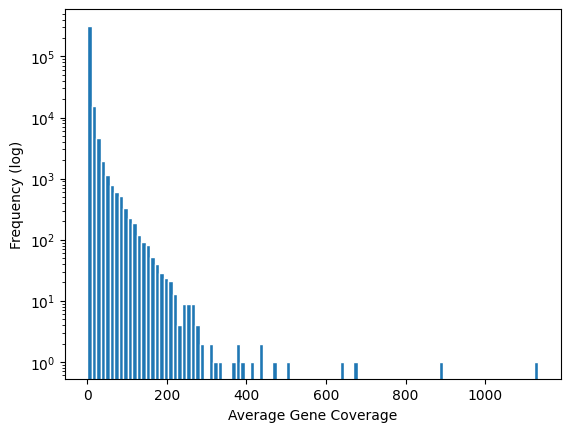

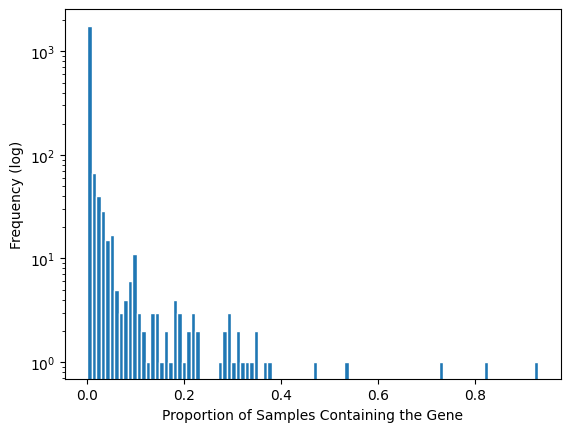

In [9]:
# Average Gene Coverage
sum_taxon_coverage = df_genes.sum(0).sort_values(ascending=False)
plt.hist(sum_taxon_coverage.values/df_genes.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Average Gene Coverage')
plt.yscale('log')
plt.show()

# Average Gene Count
count_genes = (df_genes > 0).sum(0).sort_values(ascending=False)
plt.hist(count_taxon.values / df_genes.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Proportion of Samples Containing the Gene')
plt.yscale('log')
plt.show()

In [10]:
count_threshold = 200

print(f'# Genes that appear in less than {count_threshold} samples: {int((count_genes < count_threshold).sum())}')

# Genes that appear in less than 200 samples: 86651


# Useless Data

In [11]:
print(f'{(count_genes==0).sum()} genes never show up')
print(f'{(count_taxon==0).sum()} taxon never show up')
print('\n')
print(f'{(df_taxon.sum(1)==0).sum()} samples containt no taxon present')
print(f'{(df_genes.sum(1)==0).sum()} samples containt no taxon present')
print('\n')
print(f'{(count_genes==df_genes.shape[0]).sum()} genes always show up')
print(f'{(count_taxon==df_taxon.shape[0]).sum()} taxon always show up') # bifidus infantis should show up on all samples (and it does!)

6328 genes never show up
0 taxon never show up


0 samples containt no taxon present
0 samples containt no taxon present


0 genes always show up
0 taxon always show up


# Sparsity

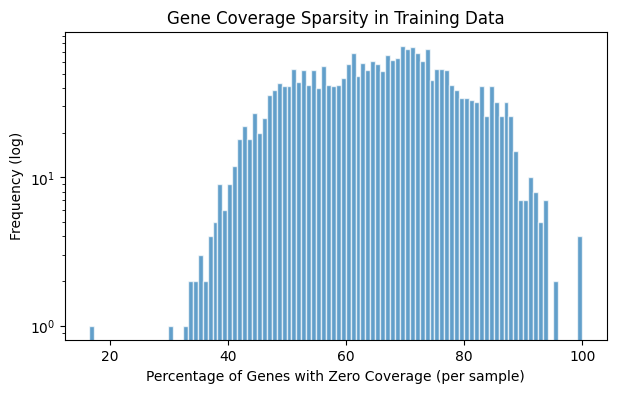

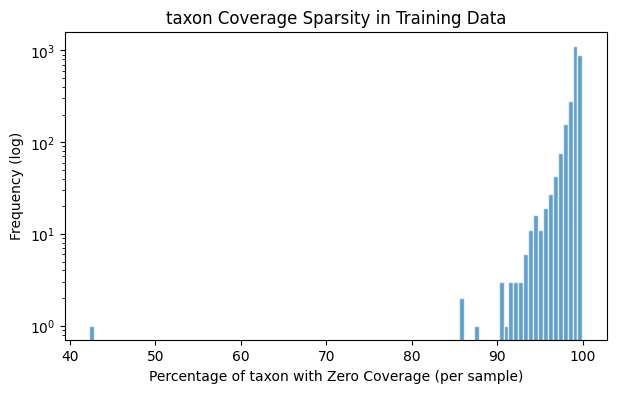

In [12]:
# Gene Sparsity per Sample
gene_sparsity = (df_genes == 0).sum(axis=1) / df_genes.shape[1] * 100

plt.figure(figsize=(7, 4))
plt.hist(gene_sparsity.values, bins=100, edgecolor='white', alpha=0.7)
plt.xlabel("Percentage of Genes with Zero Coverage (per sample)")
plt.ylabel("Frequency (log)")
plt.yscale("log")  # Log scale for better visibility
plt.title("Gene Coverage Sparsity in Training Data")
plt.show()

# taxon Sparsity per Sample
taxon_sparsity = (df_taxon == 0).sum(axis=1) / df_taxon.shape[1] * 100  # Percentage of zero taxon per sample

plt.figure(figsize=(7, 4))
plt.hist(taxon_sparsity.values, bins=100, edgecolor='white', alpha=0.7)
plt.xlabel("Percentage of taxon with Zero Coverage (per sample)")
plt.ylabel("Frequency (log)")
plt.yscale("log")  # Log scale for better visibility
plt.title("taxon Coverage Sparsity in Training Data")
plt.show()

## Core Genes

$$
M_{ij} = \frac{\sum_k S_{ki} G_{kj}}{\min(N_i, N_j)}
$$

where:

$$
S \in \{0,1\}^{n_{\text{samples}} \times n_{\text{taxon}_f}},
$$
$$
G \in \{0,1\}^{n_{\text{samples}} \times n_{\text{genes}_f}}
$$

$$
N_i = \sum_k S_{ki}, \quad N_j = \sum_k G_{kj}
$$


In [13]:
# We'll use a co-occurrence matrix to determine the core genes. 
# For it to be manageable we must remove non statistically significant taxon and genes!

###############################################################################
# 0) Parameters
###############################################################################
threshold = 200  # minimum number of samples in which a gene/taxon must appear

###############################################################################
# 1) Match sample indices
###############################################################################
common_samples = np.intersect1d(df_genes.index.values, df_taxon.index.values)
df_genes_matched = df_genes.loc[common_samples]
df_taxon_matched = df_taxon.loc[common_samples]

###############################################################################
# 2) Apply the per-column presence filter (≥ threshold)
#    - We want to keep only those genes/taxon that appear in at least
#      'threshold' samples.
###############################################################################

# Convert to NumPy arrays
genes_array = df_genes_matched.to_numpy()     # shape (n_samples, n_genes)
taxon_array = df_taxon_matched.to_numpy() # shape (n_samples, n_taxon)

# Boolean arrays where True = present (> 0), False = absent (== 0)
genes_presence = (genes_array > 0)
taxon_presence = (taxon_array > 0)

# Count how many samples have each gene (column) present
gene_nonzero_counts = np.sum(genes_presence, axis=0)  # shape (n_genes,)
# Build mask for columns that appear in >= threshold samples
gene_mask = gene_nonzero_counts >= threshold

# Count how many samples have each taxon (column) present
taxon_nonzero_counts = np.sum(taxon_presence, axis=0)  # shape (n_taxon,)
# Build mask for columns that appear in >= threshold samples
taxon_mask = taxon_nonzero_counts >= threshold

# Filter arrays to keep only those columns
genes_filtered = genes_array[:, gene_mask]       # shape (n_samples, n_genes_f)
taxon_filtered = taxon_array[:, taxon_mask] # shape (n_samples, n_taxon_f)

# Also build the new presence arrays so we can do co-occurrence
genes_presence_f = genes_presence[:, gene_mask]       # shape (n_samples, n_genes_f)
taxon_presence_f = taxon_presence[:, taxon_mask] # shape (n_samples, n_taxon_f)

###############################################################################
# 3) Compute the co-occurrence matrix
#    We want a matrix of shape (n_taxon_f, n_genes_f) with entries:
#       #samples where taxon_i & gene_j both present
#       -------------------------------------------------
#       max(#samples taxon_i present, #samples gene_j present)
###############################################################################

# Count co-occurrences using matrix multiplication:
#   presence_taxon_f: shape (n_samples, n_taxon_f) --> but we need (n_samples, n_taxon_f) * (n_samples, n_genes_f)?
#   Actually we want (n_taxon_f, n_samples) @ (n_samples, n_genes_f) => (n_taxon_f, n_genes_f)
#   So we transpose taxon_presence_f to shape (n_taxon_f, n_samples).

# However, np.dot(...) needs numeric (int/float). We can cast bool->int.
taxon_int = taxon_presence_f.astype(int).T   # shape (n_taxon_f, n_samples)
genes_int = genes_presence_f.astype(int)         # shape (n_samples, n_genes_f)

# co_occurrence_counts[i, j] = sum over samples of (taxon_i_present * gene_j_present)
co_occurrence_counts = np.dot(taxon_int, genes_int)  # shape (n_taxon_f, n_genes_f)

# Next, we need the denominators:
#   denom(i, j) = max(#samples taxon_i present, #samples gene_j present)
# We already have taxon_nonzero_counts and gene_nonzero_counts, but let's
# get them for the *filtered* sets:
taxon_pres_counts_f = np.sum(taxon_presence_f, axis=0)  # shape (n_taxon_f,)
gene_pres_counts_f = np.sum(genes_presence_f, axis=0)       # shape (n_genes_f,)

# For each (i, j), denominator = max(taxon_pres_counts_f[i], gene_pres_counts_f[j]).
# We can do that in a fully vectorized way with np.maximum.outer:
denominator_matrix = np.minimum.outer(taxon_pres_counts_f, gene_pres_counts_f)  
# shape (n_taxon_f, n_genes_f)

# Finally, compute the ratio. Convert to float to avoid integer division:
co_occurrence_matrix = co_occurrence_counts / denominator_matrix

###############################################################################
# 4) Wrap up results
#    co_occurrence_matrix has shape (n_taxon_f, n_genes_f).
#    Optionally, you can build a DataFrame with the filtered names:
###############################################################################
filtered_taxon_names = df_taxon_matched.columns[taxon_mask]
filtered_gene_names = df_genes_matched.columns[gene_mask]

df_co_occurrence = pd.DataFrame(
    co_occurrence_matrix,
    index=filtered_taxon_names,
    columns=filtered_gene_names
)

print("Co-occurrence matrix shape:", df_co_occurrence.shape)

Co-occurrence matrix shape: (73, 255201)


In [14]:
df_co_occurrence.T

,Bifidobacterium,Collinsella,Bacteroides,Phocaeicola,Prevotella,Faecalibacterium,Flavonifractor,Blautia_A,Copromonas,Streptococcus,...,Lactobacillus,Cutibacterium,Bacillus,Anaerobutyricum,Alistipes,Dialister,Corynebacterium,Pseudomonas_E,Haemophilus,Anaeroglobus
MGYG000040295_1_1076,0.998041,0.335129,0.430950,0.417989,0.515991,0.303140,0.293706,0.404570,0.417293,0.854065,...,0.365823,0.135081,0.003906,0.400000,0.365314,0.442982,0.442922,0.022222,0.553435,0.413793
MGYG000235258_187_1,1.000000,0.555422,0.704819,0.392857,0.294243,0.549517,0.557831,0.422043,0.481203,0.922892,...,0.459494,0.522177,0.917969,0.496296,0.461255,0.429825,0.155251,0.874074,0.286260,0.306034
MGYG000287854_166_1,0.998541,0.523707,0.520701,0.641534,0.746269,0.541063,0.469697,0.725806,0.800752,0.844639,...,0.462025,0.161290,0.011719,0.874074,0.804428,0.833333,0.570776,0.044444,0.694656,0.517241
MGYG000081795_71_1,0.995261,0.348341,0.540284,0.466825,0.222749,0.341232,0.357820,0.504739,0.312030,0.905213,...,0.203791,0.071090,0.003906,0.344444,0.332103,0.271930,0.187215,0.022222,0.171756,0.163793
MGYG000251915_8_1,1.000000,0.479839,0.590054,0.461022,0.511727,0.420699,0.380376,0.520161,0.590226,0.903226,...,0.266129,0.054435,0.011719,0.540741,0.523985,0.587719,0.196347,0.022222,0.454198,0.478448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGYG000032708_99_5,0.985185,0.603448,0.625926,0.447090,0.430704,0.625604,0.588578,0.479839,0.488722,0.893519,...,0.581013,0.618952,0.996094,0.514815,0.512915,0.543860,0.232877,0.955556,0.393130,0.340517
MGYG000174374_194_5,1.000000,0.325431,0.484144,0.444444,0.385928,0.281401,0.321678,0.448925,0.409774,0.913319,...,0.297468,0.098790,0.035156,0.403704,0.409594,0.421053,0.301370,0.051852,0.496183,0.418103
MGYG000063533_28_7,0.998650,0.373819,0.491228,0.371120,0.460554,0.319838,0.288799,0.369771,0.383459,0.941970,...,0.264507,0.052419,0.003906,0.355556,0.309963,0.385965,0.164384,0.014815,0.412214,0.340517
MGYG000178890_63_8,0.945615,0.504310,0.527866,0.675926,0.699360,0.507246,0.466200,0.693548,0.740602,0.851801,...,0.474684,0.290323,0.062500,0.648148,0.653137,0.692982,0.639269,0.092593,0.687023,0.607759


In [15]:
# Sanity check. Bifidobacterium infantis should have all genes always
# df_co_occurrence.T['Bifidobacterium infantis'].sum() == df_co_occurrence.shape[1]

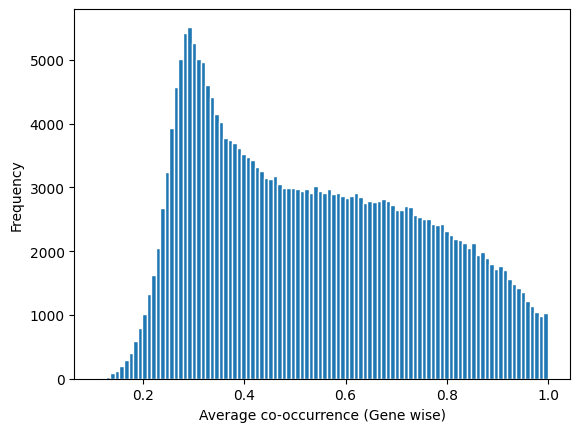

In [16]:
# Co-occurrence sum per gene
sum_co_occ_genes = df_co_occurrence.T.sum(1)/df_co_occurrence.shape[0]
plt.hist(sum_co_occ_genes.values, edgecolor='white', bins=100)
plt.ylabel('Frequency')
plt.xlabel('Average co-occurrence (Gene wise)')
#plt.yscale('log')
plt.show()

# Samples

## Cosine Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
print(f'{int(0.5*df_taxon.shape[0]**2) - df_taxon.shape[0]} Operations')

df_taxon = df_taxon.loc[df_genes.index]
# (df_taxon.index == df_genes.index).sum() == df_taxon.shape[0] # sanity check

3615360 Operations


In [19]:
threshold = None

if threshold: # makes no difference for cosine similarity plot
    df_taxon = df_taxon.loc[:, count_taxon >= threshold]
    df_genes = df_genes.loc[:, count_genes >= threshold]

# taxon similarity
print('Generating taxon similarity matrix...')
taxon_cosine_sim_matrix = pd.DataFrame(
# Here we remove the Bifidobacterium infantis, because it has a big impact on cosine similatiry
    cosine_similarity(df_taxon), 
    index=df_taxon.index,
    columns=df_taxon.index
)

# genes similarity
print('Generating genes similarity matrix...')
genes_cosine_sim_matrix = pd.DataFrame(
    cosine_similarity(df_genes),
    index=df_genes.index,
    columns=df_genes.index
)

Generating taxon similarity matrix...
Generating genes similarity matrix...


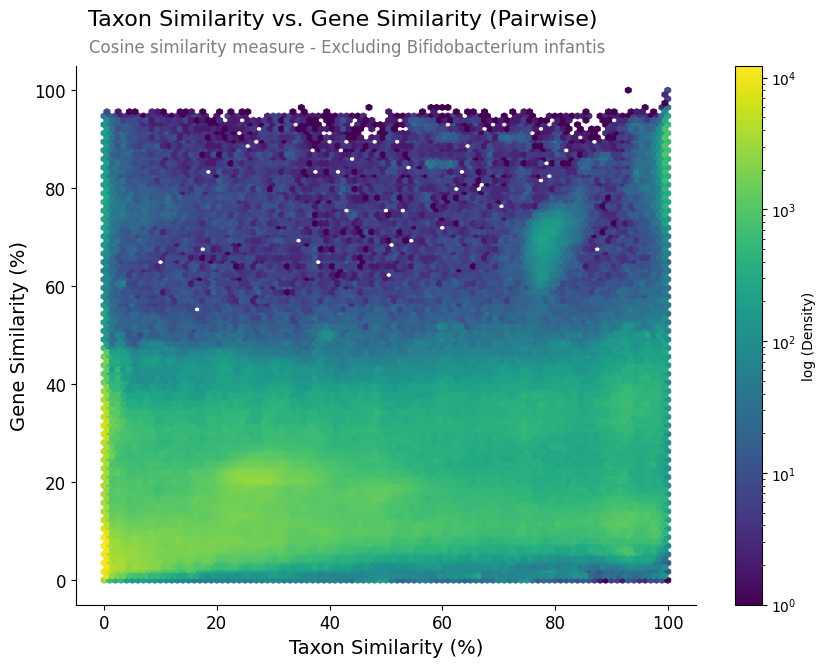

In [20]:
# Extract upper triangle values (excluding diagonal)
taxon_vals = taxon_cosine_sim_matrix.where(np.triu(np.ones(taxon_cosine_sim_matrix.shape), k=1).astype(bool)).stack()
genes_vals = genes_cosine_sim_matrix.where(np.triu(np.ones(genes_cosine_sim_matrix.shape), k=1).astype(bool)).stack()

plt.figure(figsize=(10, 7))
hb = plt.hexbin(
    taxon_vals * 100, genes_vals * 100, gridsize=100, cmap='viridis', bins='log'
)

cb = plt.colorbar(label='log (Density)')

plt.xlabel('Taxon Similarity (%)', fontsize=14)
plt.ylabel('Gene Similarity (%)', fontsize=14)
plt.title('Taxon Similarity vs. Gene Similarity (Pairwise)', fontsize=16, x=0.43, y=1.06)
plt.suptitle('Cosine similarity measure - Excluding Bifidobacterium infantis', fontsize=12, color='gray', x=0.396, y=0.92)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()